
Note: the first part of this file is largely based on [A quick tour of GA](https://luca-scr.github.io/GA/articles/GA.html) by Luca Scrucca.

# Introduction

Genetic algorithms (GAs) are stochastic search algorithms inspired by the basic principles of biological evolution, genetics and natural selection. GAs simulate the evolution of living organisms --where the fittest individuals (tend to) dominate over the weaker ones-- by mimicking the biological mechanisms of evolution, such as selection, crossover and mutation.

The R package **GA** provides a collection of general purpose functions for optimization using genetic algorithms. The package includes a flexible set of tools for implementing genetic algorithms search in both the continuous and discrete case, whether constrained or not. Users can easily define their own objective function depending on the problem at hand. Several genetic operators are available and can be combined to explore the best settings for the current task. Furthermore, users can define new genetic operators and easily evaluate their performance. Local search using general-purpose optimisation algorithms can be applied stochastically to exploit interesting regions, leading to hybrid schemes; this idea was originally named Lamarckianism. GAs can be run sequentially or in parallel, using an explicit master-slave parallelisation or a coarse-grain islands approach.

This document gives a quick tour of **GA** (version `r packageVersion("GA")`) functionalities. It was written in R Markdown, using the [knitr](https://cran.r-project.org/package=knitr) package for production. Specifically, the [R book page](https://r4ds.had.co.nz/r-markdown.html) provides very good information for other output formats.

Further details about the **GA** package are provided in the papers Scrucca (2013) and Scrucca (2017). See also `help(package="GA")` for a list of available functions and methods. 

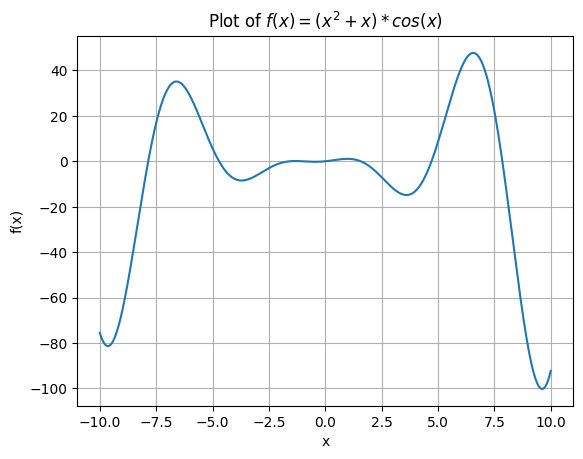

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**2 + x) * np.cos(x)

lbound, ubound = -10, 10
x_values = np.linspace(lbound, ubound, 1000)
y_values = f(x_values)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x) = (x^2 + x) * cos(x)$')
plt.grid(True)
plt.show()

In [19]:
import pygad
def f(x):
    return (x**2 + x) * np.cos(x)

def fitness_func(ga_instance, solution, solution_idx):
    output = (solution**2 + solution) * np.cos(solution)
    return output

fitness_function = fitness_func
init_range_low = -10
init_range_high = 10
gene_type = float

ga_instance = pygad.GA(fitness_func=fitness_function,
                    #    init_range_low=init_range_low,
                    #    init_range_high=init_range_high,
                       num_genes=50,
                       sol_per_pop=10,
                       num_generations=100,
                       num_parents_mating=2,
                       gene_type=gene_type,
                       gene_space={'low': -10, 'high': 10},
                       mutation_probability=0.1,
                       keep_elitism=2,
                       crossover_probability=0.8,
                       save_best_solutions=False,)

ga_instance.run()

In [20]:
for i, solution in enumerate(ga_instance.best_solutions):
    print("Evaluation of the best solution: {solution}".format(solution=np.median(f(solution))))

In [23]:
ga_instance.plot_result()

AttributeError: 'GA' object has no attribute 'plot_result'

In [22]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution_fitness

array([-1.01628048e+01, -2.22864646e-01,  4.79495783e-01,  3.50021984e+01,
       -7.61463290e+01,  4.12552417e+01,  4.18536471e+01, -5.19749490e+00,
       -1.08807458e+01,  3.16296647e+01, -3.48903277e+00,  4.92055725e-01,
       -7.84119583e+00, -7.94575077e+01, -2.04892524e+00, -3.29009419e+00,
       -1.35700299e+00,  1.89204900e+01,  3.99268757e+01,  8.55037451e-01,
        2.57301986e+01,  4.52152567e+01,  4.82140293e+00,  3.22524286e+01,
        3.26001846e+01,  5.65324884e-02,  4.09038046e+01, -1.37963573e+01,
       -6.91741705e-01, -1.17081802e+01, -4.26428291e+00, -8.13675326e+01,
       -6.13360014e+01, -5.94790656e+01, -1.29010453e+01,  4.77046268e+01,
       -4.51042194e+00,  1.33797253e+01, -2.01886636e-01,  1.98677217e+01,
       -7.04960467e+01, -2.07580128e+00, -9.96222285e+01, -2.19400903e-01,
       -3.28578146e+00,  1.03039764e-01, -2.22644303e-01, -2.51124136e-02,
        4.76865433e+01, -3.69279433e+01])

In [24]:
solution_idx

2

In [25]:
np.max(f(solution))

47.7046267716297

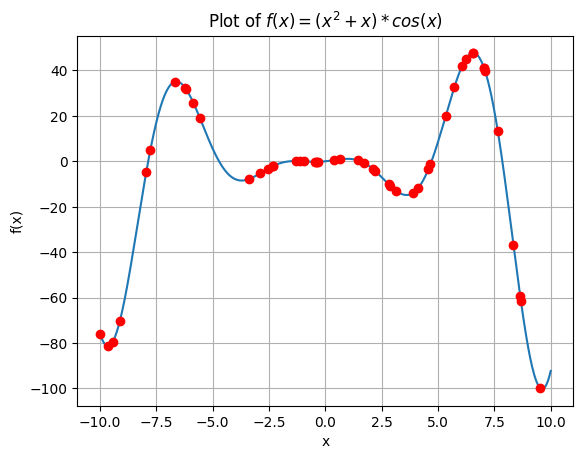

In [26]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
# print("Point of the best solution : {solution}".format(solution=solution))
x_sol = np.argmax(f(solution))
# sol = np.max(f(solution[x_sol]))

plt.plot(x_values, y_values)
plt.plot(solution, solution_fitness, 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x) = (x^2 + x) * cos(x)$')
plt.grid(True)
plt.show()

In [27]:
ga_instance.plot_genes(solutions=[solution])

The solutions parameter must be a string but <class 'list'> found.


RuntimeError: The solutions parameter must be a string but <class 'list'> found.

In [63]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Point of the best solution : {solution}".format(solution=solution))
# print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# min_prediction = np.min(f(solution))
# max_prediction = np.max(f(solution))
# print("Predicted output based on the minimum solution : {prediction}".format(prediction=min_prediction))
# print("Predicted output based on the maximum solution : {prediction}".format(prediction=max_prediction))

Point of the best solution : [ 6.27683353 -0.91769408 -0.37947944  0.81481087 -3.63142518 -3.84551296
 -5.73678617  7.2015882   1.3374047  -5.91933344 -6.73834932 -4.04376101
  7.82607881  9.01282406 -9.14344633  4.25140834  8.65900961  6.97618289
 -1.25378849  4.46896419 -9.13159717  0.11797562 -2.52392252 -8.53666062
  2.60493004 -0.34873704 -7.17450165 -4.19737335 -5.54975373  3.93839631
 -0.60802966  2.54211126 -0.4957548  -1.38998763 -0.6528535   3.78251124
 -4.45734434 -7.75824619  2.14081498  6.85054857 -7.23590065 -4.56543156
  8.97429273 -9.5160819   7.60220397 -9.89745628  1.02824736  6.3405494
  0.72181071  6.68299828]
